In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


In [58]:
df=pd.read_csv("C:\\Users\\mahen\\Downloads\\tested.csv")

In [59]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [60]:
print('Titanic Data size',df.size)
print("Titanic Data shape",df.shape)

Titanic Data size 5016
Titanic Data shape (418, 12)


In [61]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [62]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Visualization of Data

<Axes: >

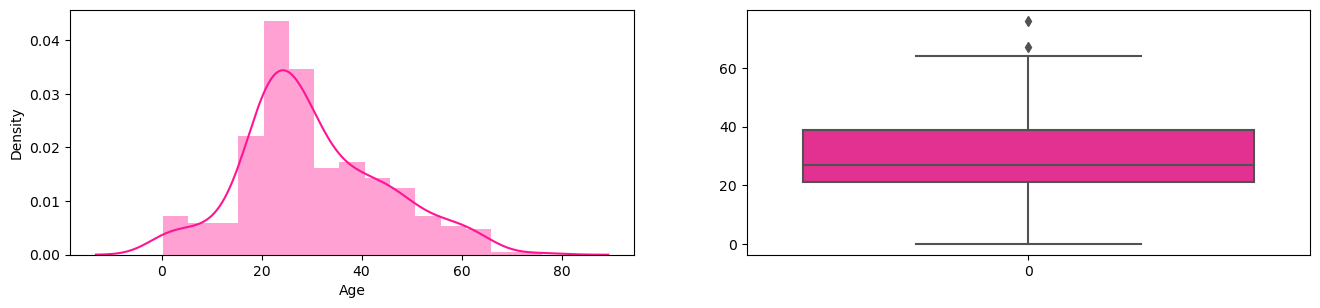

In [63]:
plt.figure(figsize=(16,7))
plt.subplot(2,2,1)
sns.distplot(df['Age'],color='DeepPink')
plt.subplot(2,2,2)
sns.boxplot(df['Age'],color='DeepPink')

In [64]:
df['Age'].value_counts()

21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: Age, Length: 79, dtype: int64

observation 
1. in the ship mostly there are people who has age 21,24
2. and there are lot of outliers present in the age column and will be fixed through impute method

findfont: Font family 'LUCIDA Calligraphy' not found.
findfont: Font family 'LUCIDA Calligraphy' not found.
findfont: Font family 'LUCIDA Calligraphy' not found.
findfont: Font family 'LUCIDA Calligraphy' not found.
findfont: Font family 'LUCIDA Calligraphy' not found.
findfont: Font family 'LUCIDA Calligraphy' not found.


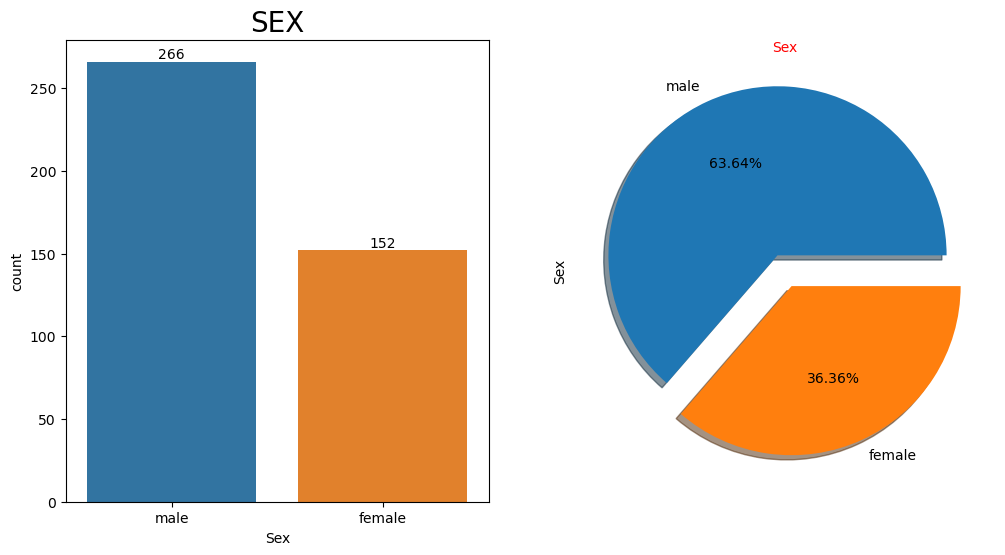

In [65]:
plt.figure(figsize=(12,6))

ax=plt.subplot(1,2,1)
ax=sns.countplot(x='Sex',data=df)
ax.bar_label(ax.containers[0]) # ax.bar_label(ax.containers[0]) line adds labels to the bars indicating the count for each category.
plt.title("SEX",fontsize=20)
ax=plt.subplot(1,2,2)
ax=df['Sex'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label='Sex',fontsize=20,color='Red',font='LUCIDA Calligraphy');


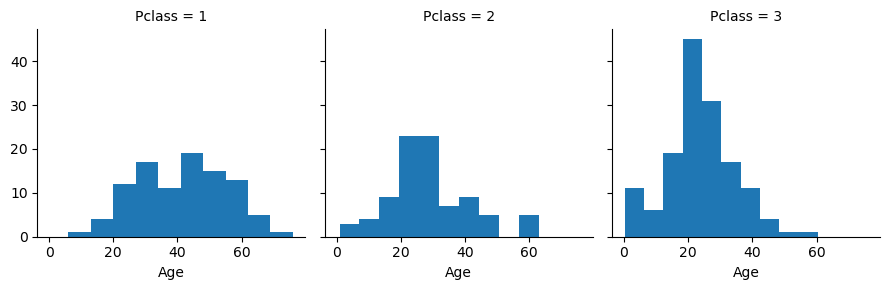

In [66]:
g=sns.FacetGrid(df,col="Pclass") # first bit creates a 3 plclass facet grid becoz the max value of the pclass is 3
g=g.map(plt.hist,"Age")# The second line g = g.map(plt.hist, "Age") maps a histogram plot onto each subplot of the FacetGrid. Specifically, it plots the distribution of the 'Age' variable for each value of the 'Pclass' variable in the input DataFrame. The plt.hist function from Matplotlib is used to create a histogram plot, and 'Age' is passed as the variable to be plotted. Overall, this code produces a set of histograms showing the distribution of ages for each passenger class in the Titanic dataset, with one histogram per passenger class. The FacetGrid allows for easy comparison of the distributions across the different passenger classes.

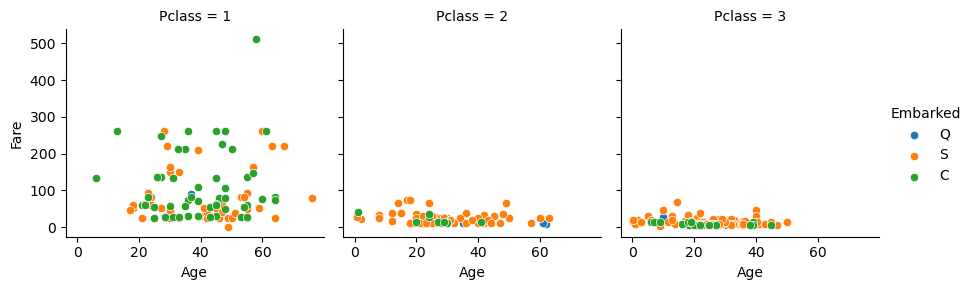

In [67]:
g=sns.FacetGrid(df,col="Pclass",hue='Embarked')# map_dataframe() is a function in the seaborn library that is used to apply a plotting function to each group of a pandas.DataFrame object. It is essentially a convenience function that simplifies the process of using FacetGrid() to create a grid of plots with one plot per group of data. The map_dataframe() function takes three arguments: func: A plotting function that takes a pd.DataFrame as its first argument and the name of the grouping variable as its second argument. data: The pd.DataFrame object to be plotted. col: The name of the column to use for grouping the data. The function applies the func function to each group of data defined by the unique values in the col column. The resulting plots are arranged in a grid, with one plot per group
g.map_dataframe(sns.scatterplot,x="Age",y="Fare")
g.add_legend()
plt.show()

Observation
1. In the 1st pclass most of the people board from the C port that to these are people who had highest fair among all the ports which are S,Q, And the min age of the people in 2nd class is 4 and max is 60 above
2. In the 2nd pclass most of the people board from the S port that to these are people  fair is max 100 , And the min age of the people in 2nd class is 1 and max is 60
3. In the 3rd pclass most of the people board from the S port that to these are people who had highest fair among all the ports which are C,Q And the min age of the people in 2nd class is 1 and max is 50


FacetGrid is a powerful tool in data visualization that allows us to create multiple small plots, or facets, from a single dataset. It is particularly useful when we want to visualize the distribution of a variable or the relationship between two variables across multiple groups or subcategories in our dataset.

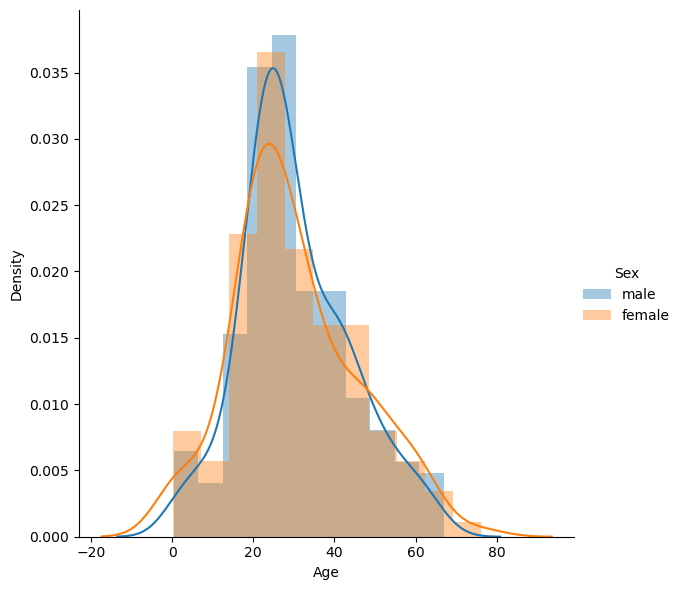

In [68]:
sns.FacetGrid(df,hue='Sex',height=6).map(sns.distplot,'Age').add_legend() # with help of map fucntion it allows me to add  another ufunction which is distplot for the age coolumn
plt.show()

observation
1. most of the male people age fall under 25 to 30
2. most of female people age fall between 30 to 35 

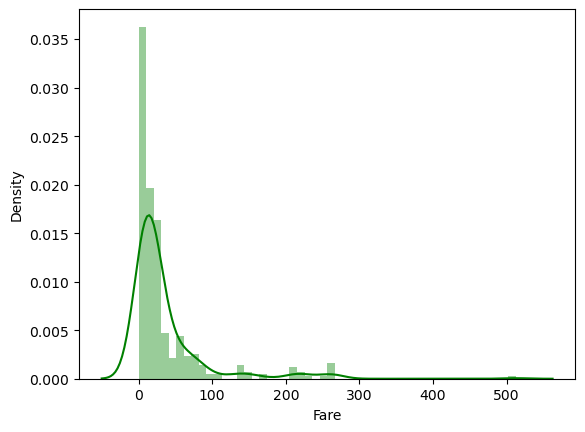

In [69]:
sns.distplot(df['Fare'],color='g')
plt.show()

Observation
mostly opted fair price fall in b/w 0 to 80 

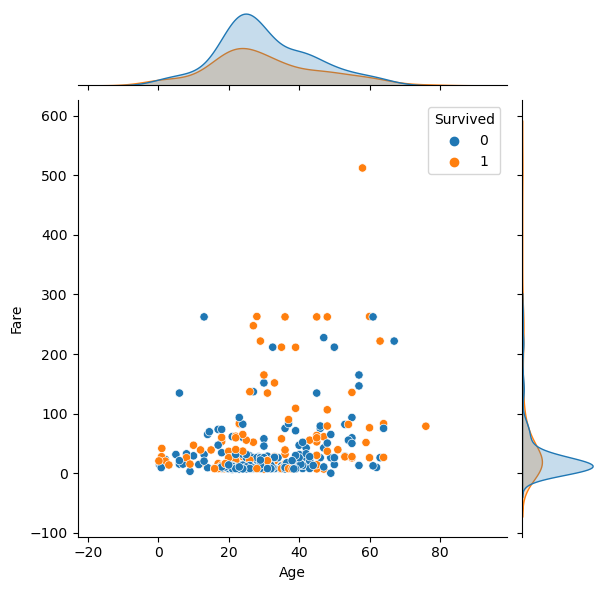

In [70]:
sns.jointplot(x='Age',y='Fare',data=df,color="olive",hue='Survived')
plt.show()

observation
1. based on the survived  column 0 indicates the passenger did not surivived, 1 indicates the the passenger surivived
2. so the passengers who opted the fair price b/w 0 to 100,most of them  were not survived 

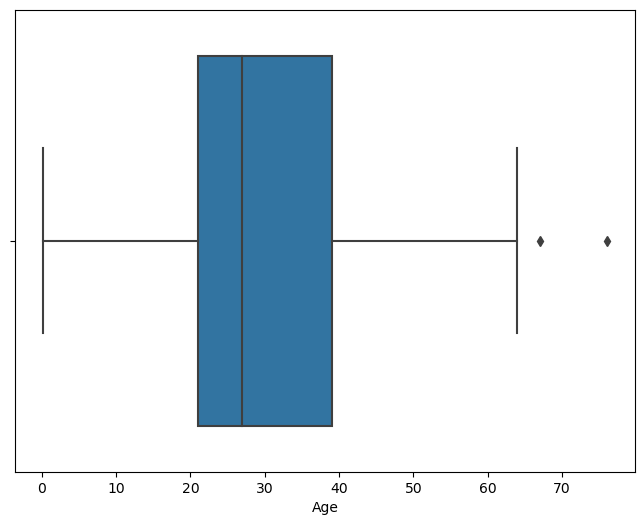

In [71]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x=df['Age'])
plt.show()

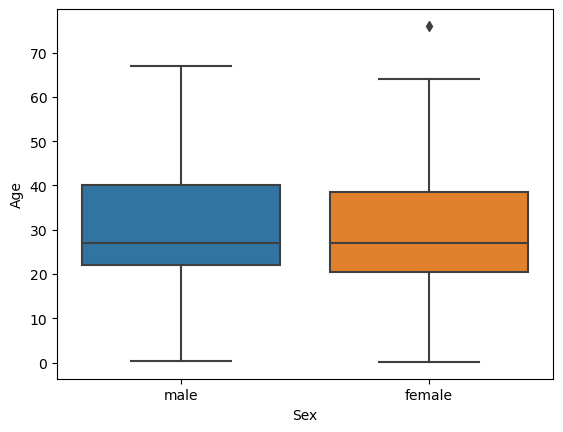

In [72]:
sns.boxplot(x='Sex',y="Age",data=df)
plt.show()

observation 
1. there are no outlier present in the male category
2. And in the female category their is outlier present that to the age is above 70 which is present as outlier


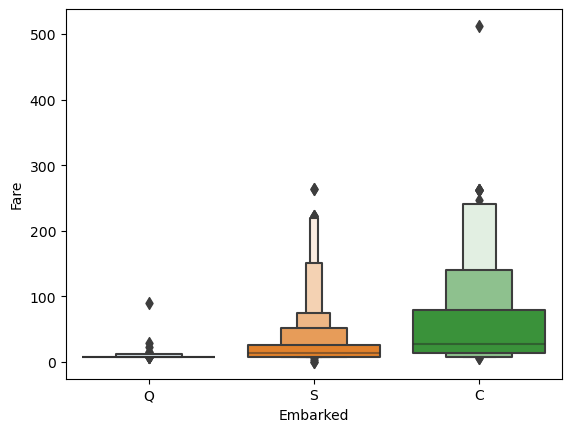

In [73]:
sns.boxenplot(y="Fare",x="Embarked",data=df)
plt.show()

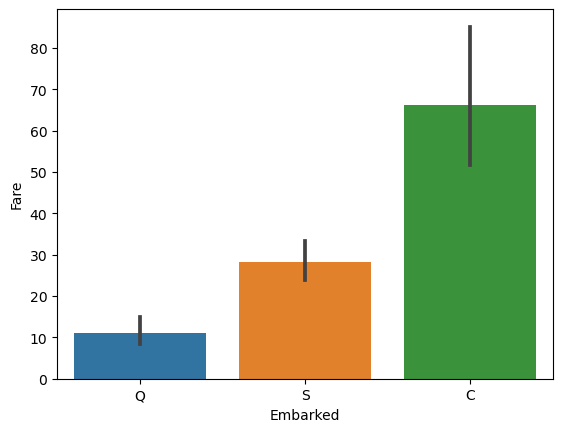

In [74]:
sns.barplot(y='Fare',x='Embarked',data=df)
plt.show()

observation
1. c port people> s port people> Q port people interms of fare of ticket 

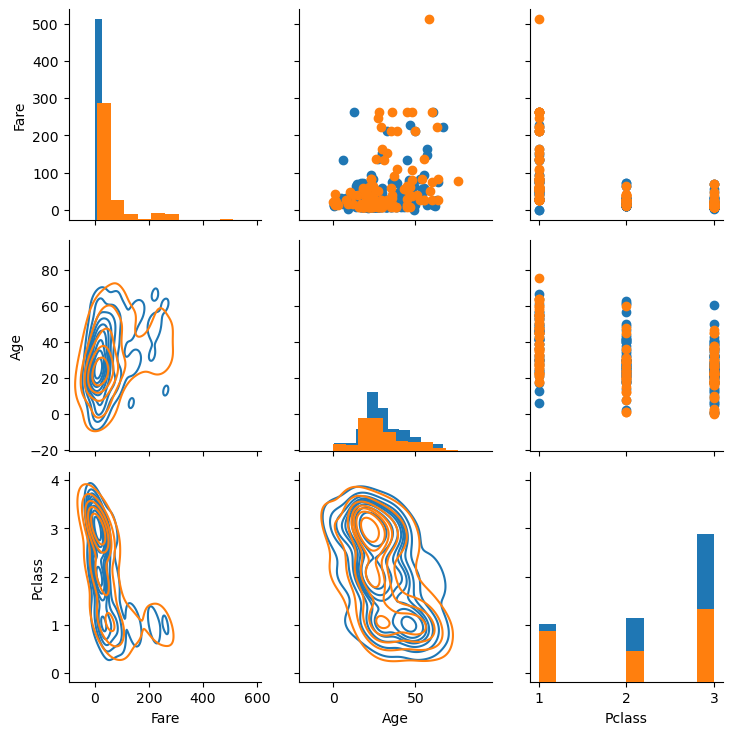

In [75]:
df_g=sns.PairGrid(df,hue='Sex',vars=['Fare','Age','Pclass'])
df_g.map_diag(plt.hist)
df_g.map_upper(plt.scatter)
df_g.map_lower(sns.kdeplot)
plt.show()

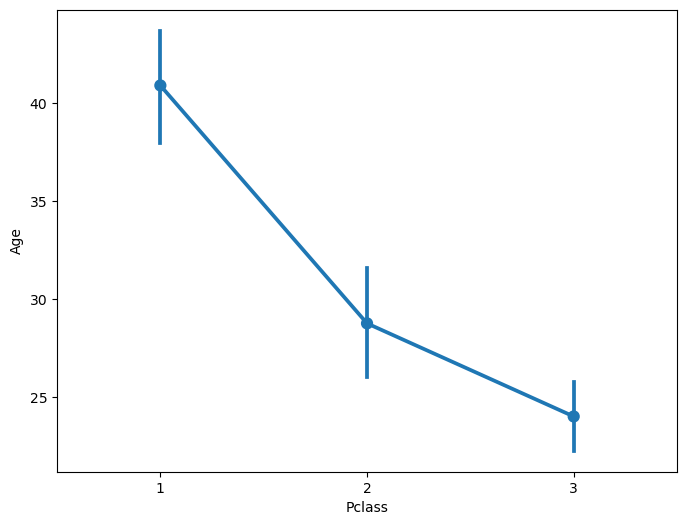

In [76]:
f,ax=plt.subplots(figsize=(8,6))
sns.pointplot(x='Pclass',y='Age',data=df)
plt.show()

observation
1. most of the aged people took 1st class and most of the 30 to 35 aged peopl took 2nd class and some people whose age is between 20and <30 took 3rd class

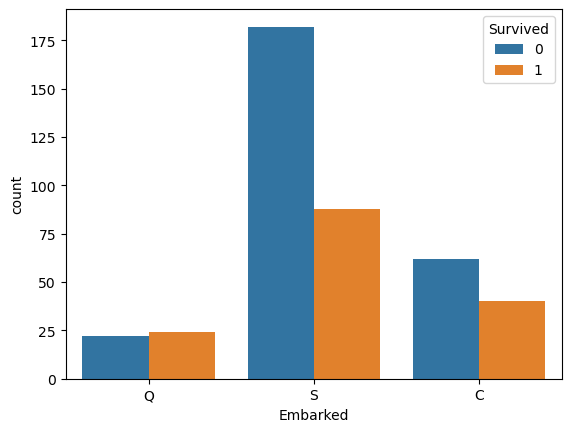

In [77]:
sns.countplot(data=df,x='Embarked',hue='Survived')
plt.show()

observation
1. the people who started there journey at the port of S those people died alot as compared Q,S ports

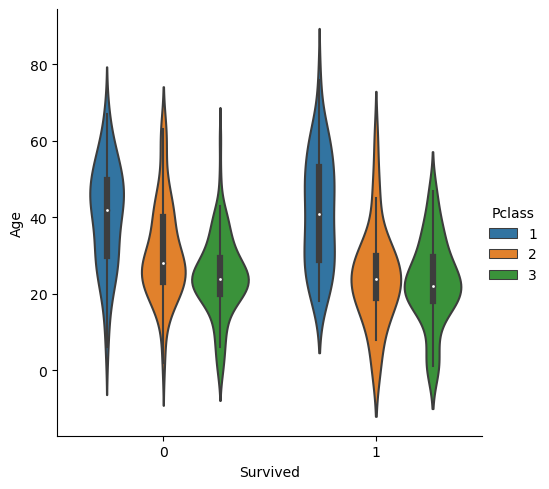

In [78]:
sns.catplot(data=df,x='Survived',y='Age',hue='Pclass',kind="violin")
plt.show()

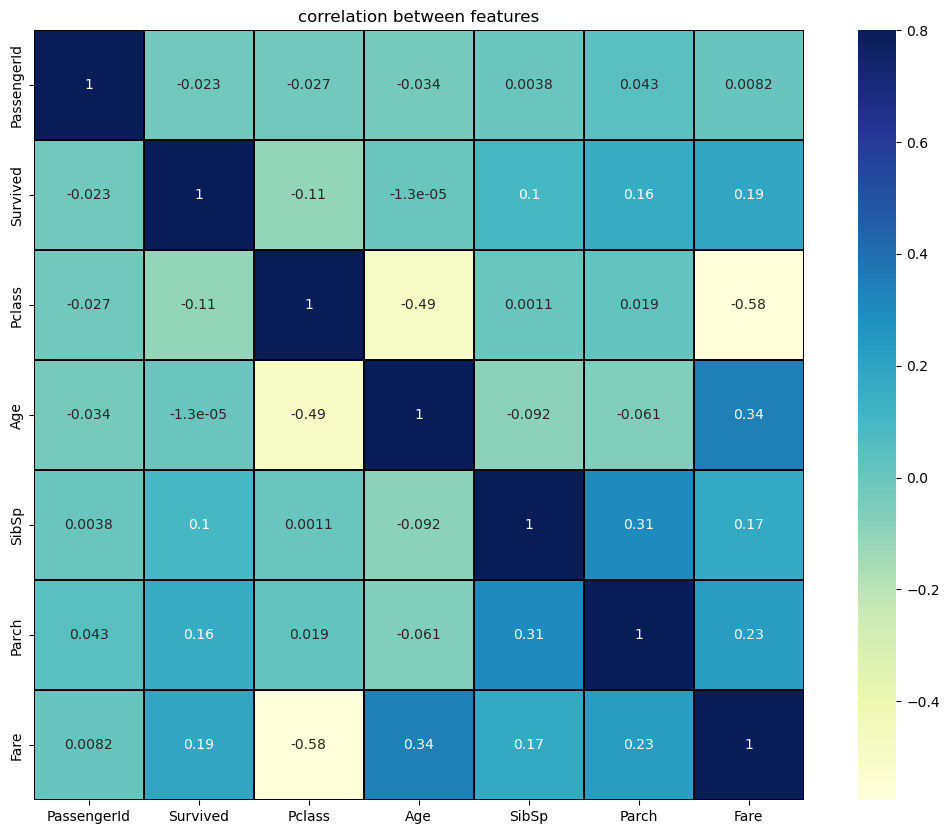

In [79]:
corr=df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr,vmax=.8,linewidths=0.01,square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('correlation between features')
plt.show()

About correlation
For example, let's say you are interested in the correlation between the total_bill and tip variables. The cell in the top left corner of the heatmap shows the correlation coefficient between these two variables. The color of the cell is dark blue, which indicates a strong positive correlation. The value in the cell is 0.6, which means that there is a 60% chance that the two variables will move in the same direction.

#### Observations

1. There is a strong positive correlation between P-class and Fare(higherclass people pay high fare like class=1)
2. There is also a strong negative correlation between P-class and Survived(This means that passengers in lower classes were less likely to survive)
3. There are also a  weak correlations in the dataset between Age and Survived(older passengers were slightly less likely to survive)
4.  a weak negative correlation between SibSp and Survived(passengers with more siblings or spouses were slightly less likely to survive)

In [80]:
# correlation heatmap of higly correlated features with SalePrice
high_corr=df.corr()
high_corr_features=high_corr.index[abs(high_corr['Fare'])>=0.25] # The code high_corr=df.corr() creates a DataFrame of correlation coefficients for all the features in the dataset df. The code high_corr_features=high_corr.index[abs(high_corr['Fare'])>=0.25] selects the features in the high_corr DataFrame whose absolute correlation with the Fare variable is greater than or equal to 0.25. The code high_corr_features prints the index of the high_corr DataFrame and 0.25 means there is 25% chance that the varaiables in the output which we got which moves 25% in the same direction,and 0.25 means the fare is maintaning moderate correlation with output variables which we got
high_corr_features # The abs() function in Python returns the absolute value of a number. In this case, we are using the abs() function to calculate the absolute value of the correlation coefficient between the Fare variable and each of the other features in the high_corr DataFrame.

Index(['Pclass', 'Age', 'Fare'], dtype='object')

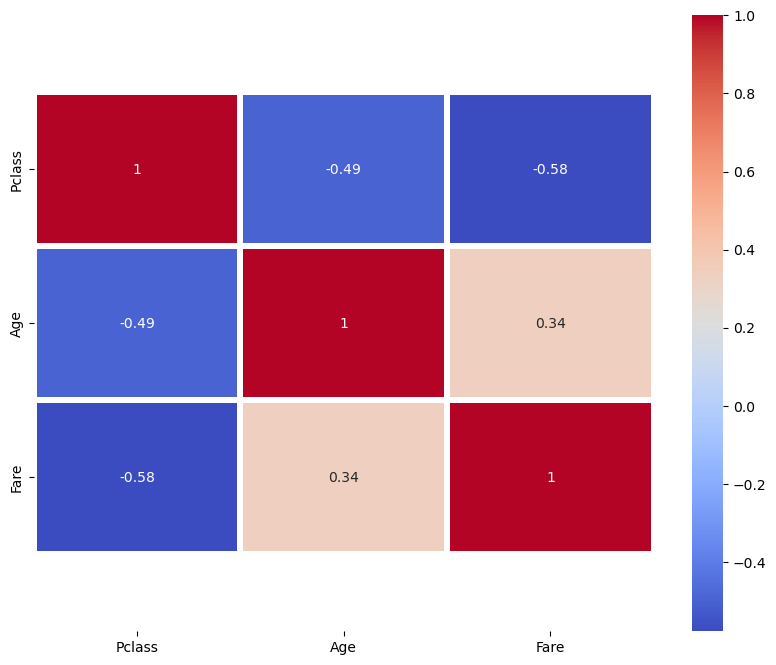

In [81]:
plt.figure(figsize=(10,8))
ax=sns.heatmap(df[high_corr_features].corr(),cmap="coolwarm",annot=True,linewidth=3)
bottom,top=ax.get_ylim() # gets the y-axis limits of the heatmap
ax.set_ylim(bottom+0.5,top-0.5) # sets the y-axis limits of the heatmap to be 0.5 units above and below the original limits. This ensures that the labels on the y-axis are not cut off.
plt.show()

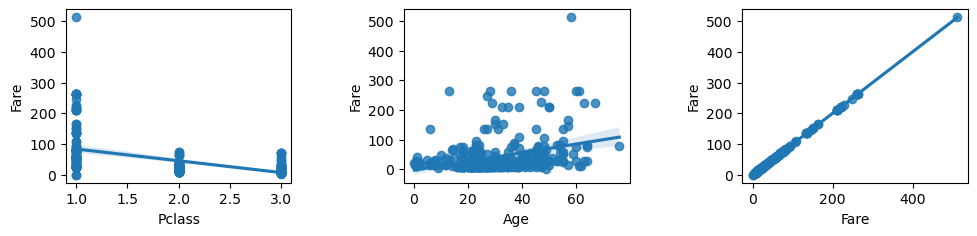

In [82]:
# Plot regplot to get the nature of highly correlated data
plt.figure(figsize=(16,9))
for i in range(len(high_corr_features)):
    if i<=9:
        plt.subplot(3,4,i+1) # creates a subplot in the figure. The 3 and 4 arguments specify that the subplot should be a 3x4 grid. The i+1 argument specifies the position of the subplot in the grid.
        plt.subplots_adjust(hspace=0.5,wspace=0.5) # adjusts the spacing between the subplots.
        sns.regplot(data=df,x=high_corr_features[i],y='Fare')
plt.show()

Description
1. as we can see the faire and age features are mostly moving in same direction but few of them slightly got scatterd and we can this is the strong positive correlation
2. as we can see the faire and pclass features are mostly they are  moving in same direction and their values mostly got merged and the same time they are  moving along with the line so they are strongly negativily  correlated 

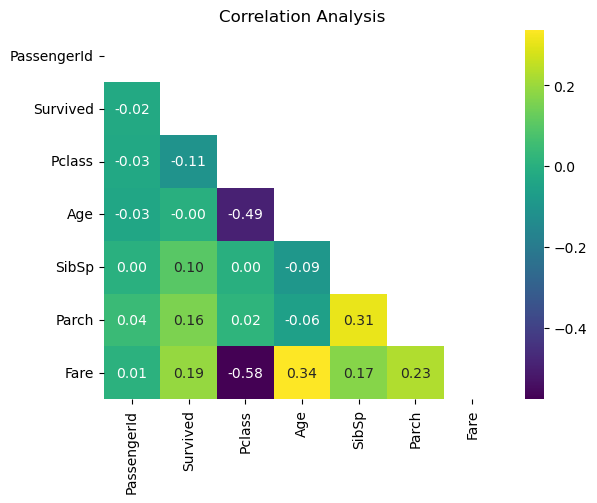

In [83]:
corr =df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool)) # mask is a variable that will store the mask that will be used to exclude the upper triangle of the correlation matrix from the heatmap. np.triu() is a NumPy function that creates a triangular array with all the elements above the diagonal set to True and all the elements below the diagonal set to False. np.ones_like() is a NumPy function that creates an array that is the same size as the input array and is filled with ones. The dtype=bool argument specifies that the array should be of type bool. The code mask=np.triu(np.ones_like(corr,dtype=bool)) creates a mask that is the same size as the correlation matrix and is filled with ones. The np.triu() function creates the triangular array, and the np.ones_like() function fills the array with ones. The dtype=bool argument specifies that the array should be of type bool. The mask will be used to exclude the upper triangle of the correlation matrix from the heatmap. This is because the upper triangle of the correlation matrix is the same as the lower triangle, so it is not necessary to plot it twice.

plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(corr,mask=mask,annot=True,lw=0,linecolor='white',cmap='viridis',fmt="0.2f")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

observation
1. pclass ,fare  and pclass age are highly correlated

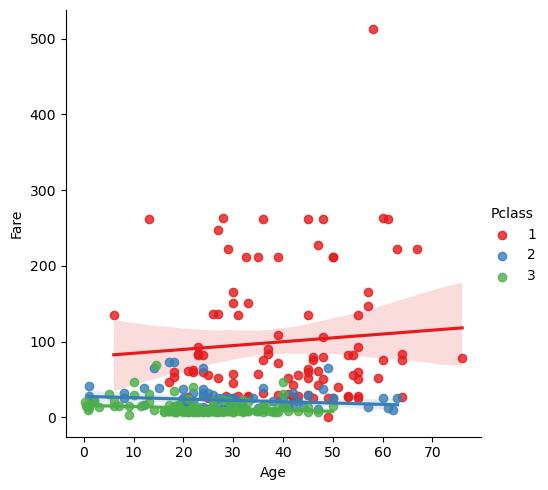

In [84]:
g=sns.lmplot(x='Age',y='Fare',hue='Pclass',data=df,palette='Set1') # The lmplot() function in Seaborn is used to create a linear regression plot. The lmplot() function takes a number of arguments, including the x-axis and y-axis variables, the data, and the style of the plot. The lmplot() function is a powerful tool for visualizing linear relationships between variables. It can be used to identify strong and weak relationships, and to see how the relationship changes over time.

observation
1. as we can see here the pclass 2,3 following the linear relationship w.r.t to Age and fare  so its weakly positivily correalted
2. and passenger class 1 got scatter too much w.r.t age and fare so its highly negative correlated

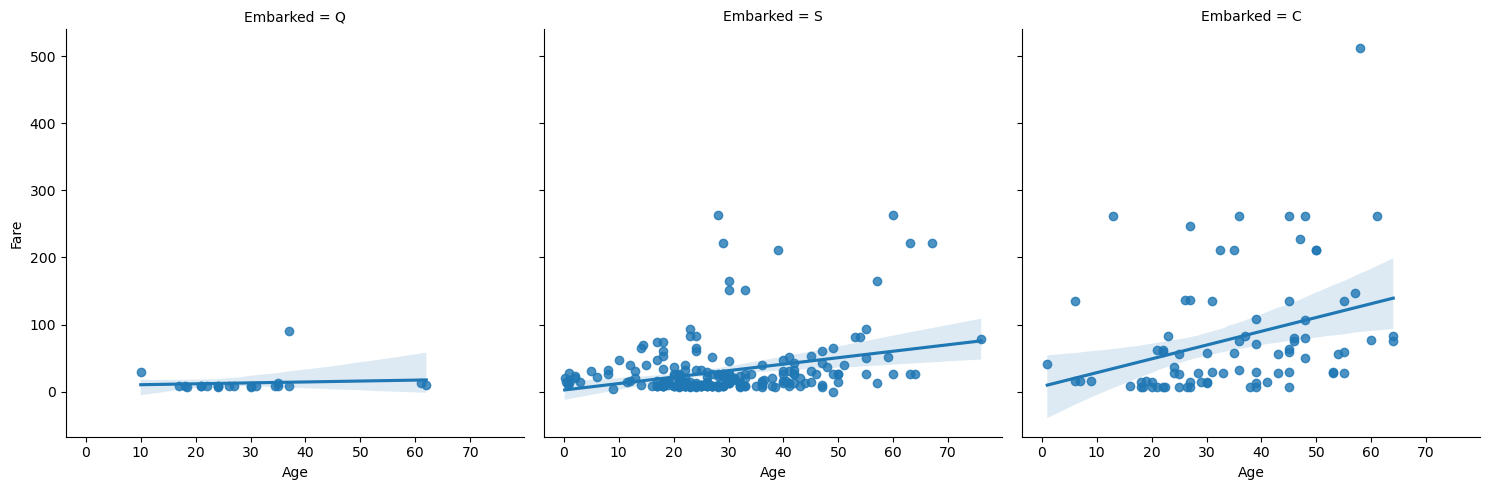

In [85]:
g=sns.lmplot(x='Age',y='Fare',col='Embarked',data=df)


observation
1. Embarked c port got scatter too much w.r.t age and fare so there is no correlation

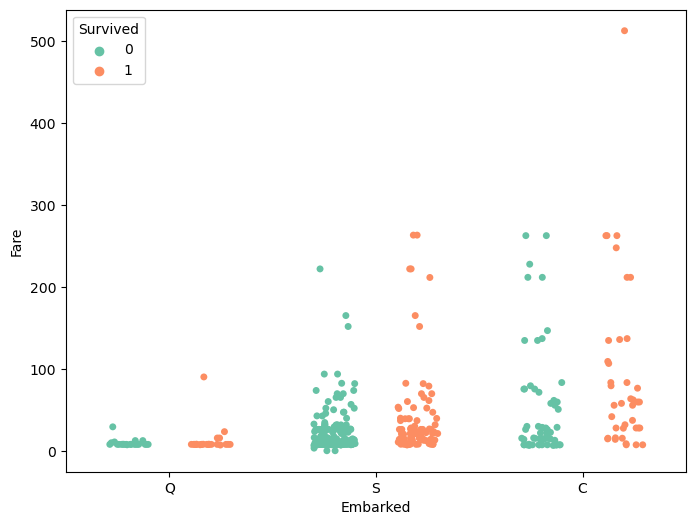

In [86]:
f,ax=plt.subplots(figsize=(8,6))
sns.stripplot(x='Embarked',y='Fare',hue='Survived',data=df,jitter=0.2,palette='Set2',dodge=True) # jitter=0.2 specifies that the data points should be jittered by 0.2 units. This will help to prevent the data points from overlapping. palette='Set2' specifies that the colors of the stripplots should be chosen from the Set2 palette. dodge=True specifies that the stripplots should be dodged. This will prevent the data points from overlapping in the hue variable. 
plt.show()

observation
1. the people who board at S port are mostly survived  and there ticket fare is mostly fall b/w 0 to 100 rupees
2. and at the same time people who board at s port are also the most died ones and their ticket price ranges from 0 to 100

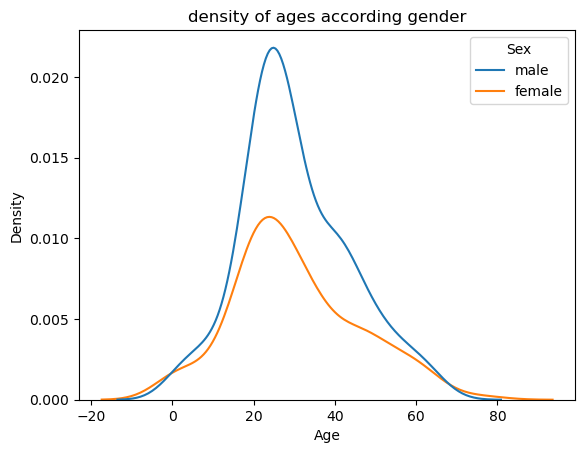

In [87]:
# what avergae of ages in each category
sns.kdeplot(data=df,x='Age',hue="Sex")
plt.title("density of ages according gender")
plt.show()

OBSERVATION 
1. In the ship mostly the age group people are bewteen 10 to 40  in both males and females  

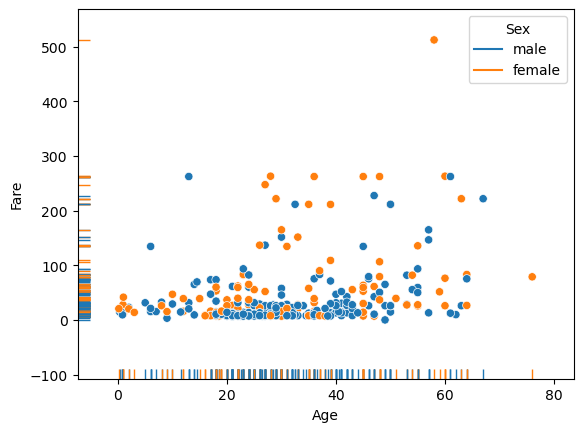

In [88]:
sns.scatterplot(data=df, x="Age", y="Fare", hue="Sex")
sns.rugplot(data=df, x="Age", y="Fare", hue="Sex")
plt.show()

### Data Preprocessing

In [89]:
## Finding the Null value in data
df.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [90]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percentage=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values=pd.concat([missing_number,missing_percentage],axis=1,keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)# here iam calling the function w.r.t values

,Missing_Number,Missing_Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


### Different ways to Visualize missing Value

<Axes: >

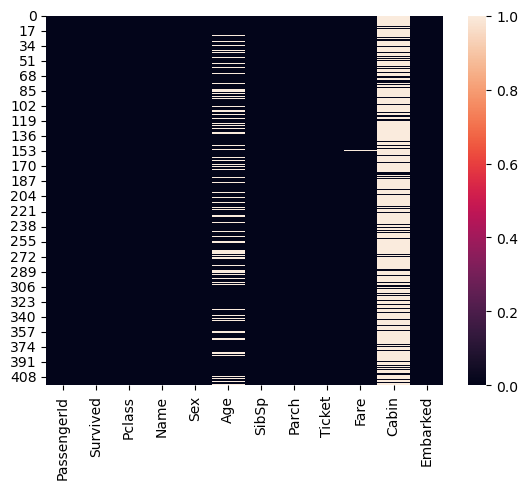

In [91]:
sns.heatmap(df.isnull())

observation 
1. through the heat map it is very easy to visualize the missing values of the columns by this we can get to how missing values in the column got spread 

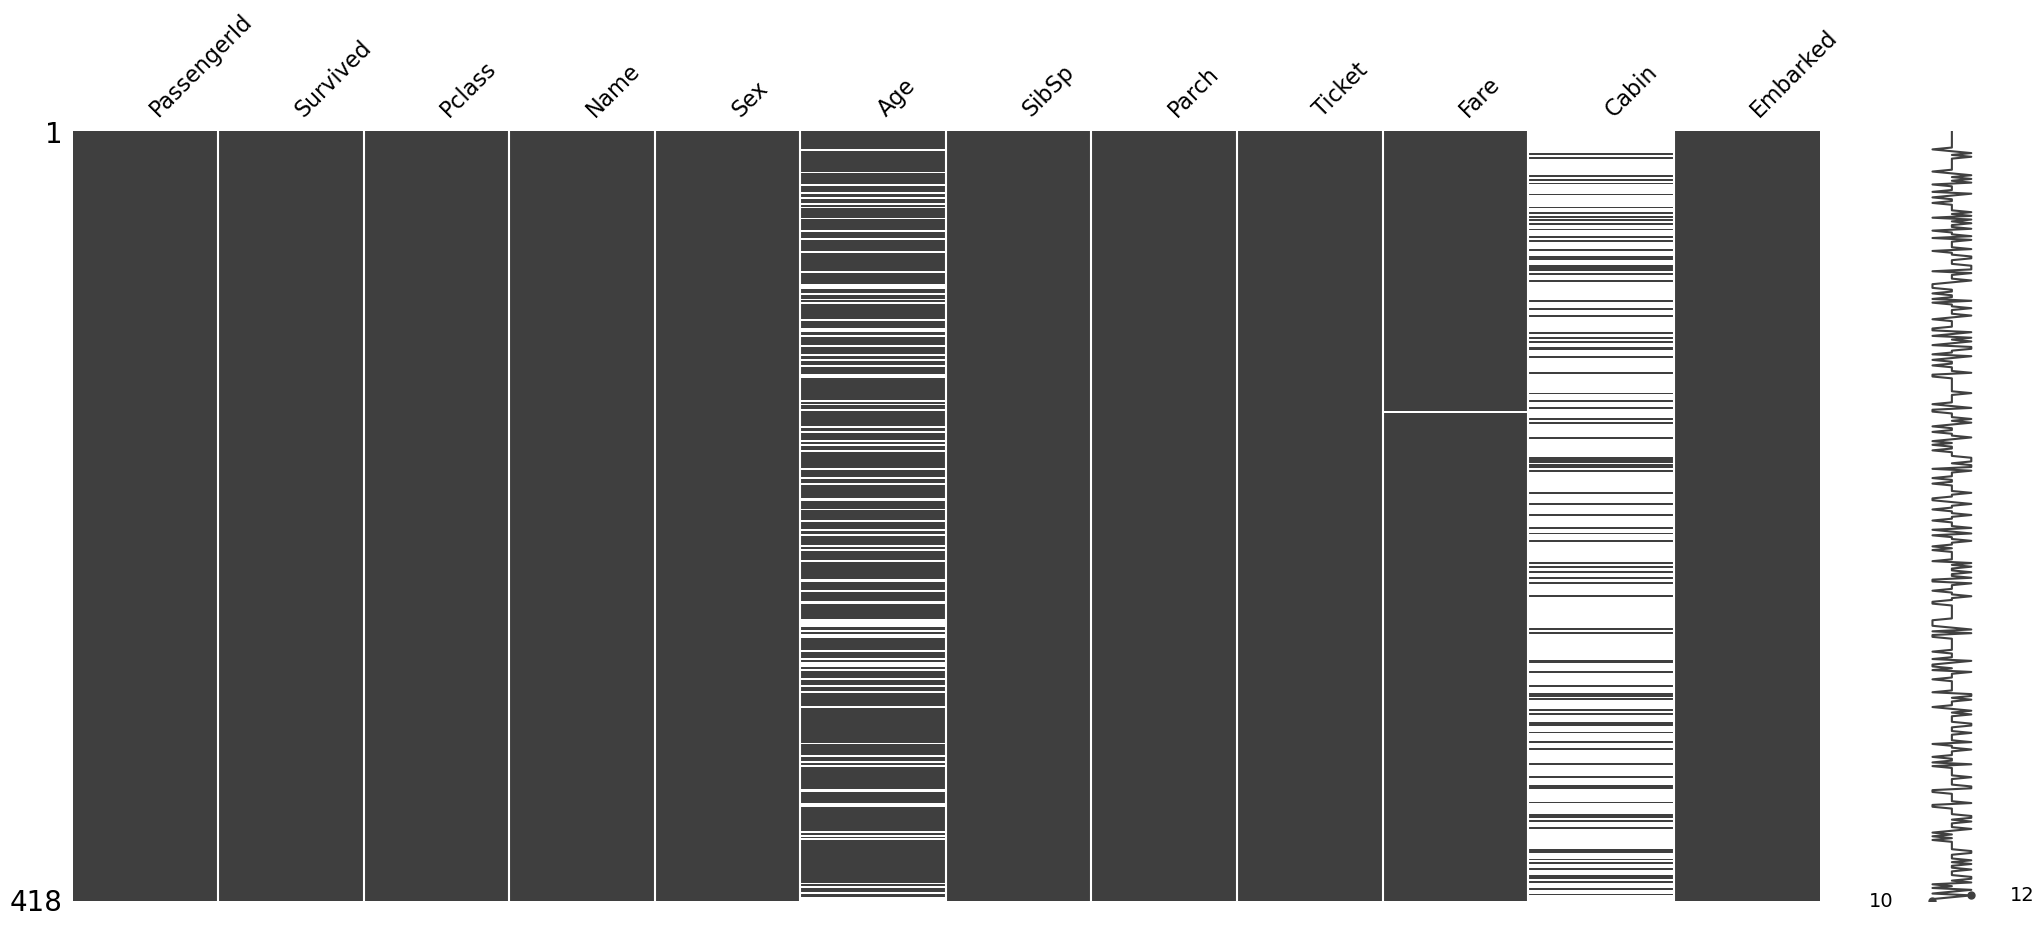

In [92]:
import missingno as msno # The missingno module is a Python library that helps you visualize missing data in your DataFrames. The matrix() function in the missingno module creates a heatmap that shows the missing values in your DataFrame. The matrix() function takes a DataFrame as its only argument. The function will create a heatmap that shows the missing values in the DataFrame. The cells in the heatmap that are missing values will be colored red. The cells in the heatmap that are not missing values will be colored white.
msno.matrix(df)
plt.show()

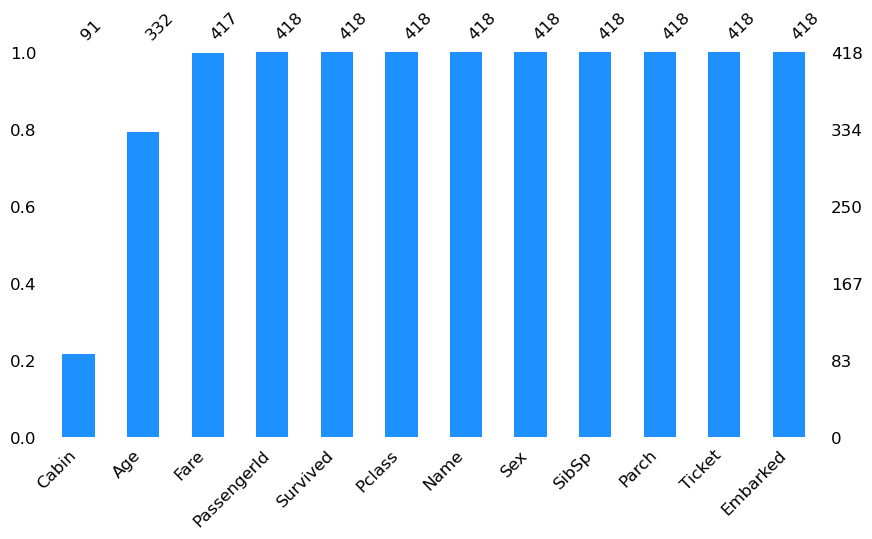

In [93]:
import missingno
missingno.bar(df,color='dodgerblue',sort='ascending',figsize=(10,5),fontsize=12);

## Removing the null value from the titanic data set

In [94]:
# Filled the missing value in Age column with the mean value
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Filled the missing value in Fare columns with mean Value
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())


observation 
1. here ia have used impute  method to fill the missing values and i have used mean ,backfill methode to replace the null values with those mean ,backfill values 

In [95]:
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


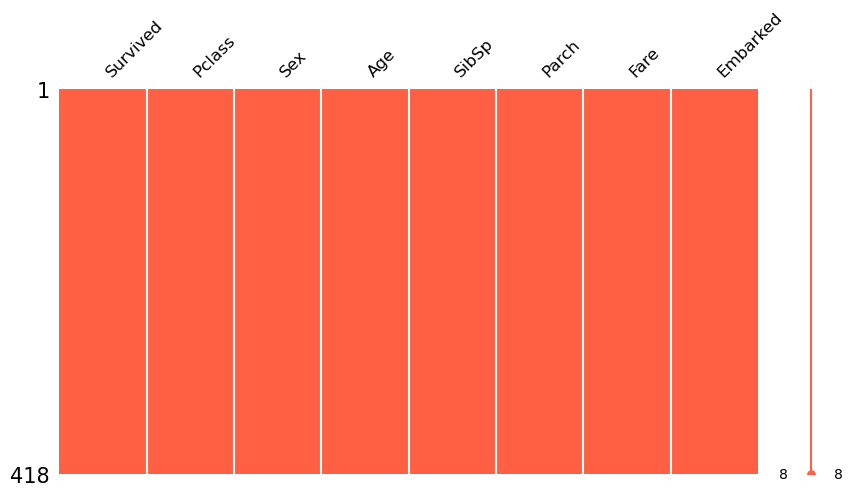

In [96]:
import missingno
missingno.matrix(df, figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27));

### Categorical value is converted into numerical value by using categorical_encoder

In [97]:
# Converting the categorical variable into the numerical variable by using category_encoder
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['Survived','Pclass','Sex','Embarked']) # Ordinal Encoding: Ordinal Encoding is a technique that assigns an integer value to each category based on its order or rank. For example, if a categorical variable has three categories (low, medium, and high), then it would be encoded as 1, 2, and 3, respectively. Ordinal Encoding preserves the order of the categories, but it may not be suitable for all types of categorical data.
df_encoded=encoder.fit_transform(df)# encoder.fit_transform(df) fits the encoder to the categorical data in df and transforms the data into numerical form. The fit_transform method first fits the encoder to the data by learning the mapping between the categories and their numerical representations. It then applies this mapping to the data and transforms the categorical variables into numerical variables
df_encoded.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,1,34.5,0,0,7.8292,1
1,2,1,2,47.0,1,0,7.0000,2
2,1,2,1,62.0,0,0,9.6875,1
3,1,1,1,27.0,0,0,8.6625,2
4,2,1,2,22.0,1,1,12.2875,2


In [98]:
pip install category_encoders


Note: you may need to restart the kernel to use updated packages.


### Splitting Independent and Dependent Variable

In [99]:
x=df_encoded.drop(['Survived'],axis=1)
y=df['Survived']

### Splitting train and test set

In [100]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [101]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
109,2,1,18.5,0,0,13.0000,2
231,3,2,21.0,0,0,26.5500,2
321,1,1,25.0,0,0,7.2292,3
398,1,1,22.0,0,0,7.7750,2
13,2,1,63.0,1,0,26.0000,2


In [102]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [103]:
X_train.shape

(292, 7)

In [104]:
X_test.shape

(126, 7)

In [105]:
y_train.shape

(292,)

In [106]:
y_test.shape

(126,)

In [107]:
X_test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
146,3,1,30.27259,0,0,51.8625,2
223,1,1,21.00000,0,0,7.7958,2
193,2,1,61.00000,0,0,12.3500,1
305,3,2,64.00000,1,1,26.5500,2
188,1,2,30.27259,8,2,69.5500,2


### Model Implementation

Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)),'\n')
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)),'\n')
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_lr)),'\n')
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_lr),'\n')
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))

Training set score: 1.00 

Test set score: 1.00 

Accuracy Score: 1.00 

Confusion Matrix: 
 [[78  0]
 [ 0 48]] 

Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        48

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

This person has survived : [1]


In [109]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


###  Random Forest Classifier (criterion='entropy')


In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

print("Training set score: {:.2f}".format(rf_ent.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rf_ent.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_rfe)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_rfe))
print("Classification_Report: \n",classification_report(y_test,y_pred_rfe))


Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[78  0]
 [ 0 48]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        48

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



### Naive Bayes GaussianNB Classifier


In [111]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
Gnb = GaussianNB()
Gnb.fit(X_train,y_train)
y_pred_Gnb = Gnb.predict(X_test)

print("Training set score: {:.2f}".format(Gnb.score(X_train, y_train)))
print("Test set score: {:.2f}".format(Gnb.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_Gnb)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_Gnb))
print("Classification_Report: \n",classification_report(y_test,y_pred_Gnb))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[78  0]
 [ 0 48]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        48

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



#### Naive Bayes BernoulliNB ClassifierNaive Bayes BernoulliNB Classifier
### Naive Bayes BernoulliNB Classifier

In [112]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
Bnb = BernoulliNB()
Bnb.fit(X_train,y_train)
y_pred_Bnb = Bnb.predict(X_test)

print("Training set score: {:.2f}".format(Bnb.score(X_train, y_train)))
print("Test set score: {:.2f}".format(Bnb.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_Bnb)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_Bnb))
print("Classification_Report: \n",classification_report(y_test,y_pred_Bnb))

Training set score: 0.64
Test set score: 0.64
Accuracy Score: 0.64
Confusion Matrix: 
 [[68 10]
 [35 13]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.66      0.87      0.75        78
           1       0.57      0.27      0.37        48

    accuracy                           0.64       126
   macro avg       0.61      0.57      0.56       126
weighted avg       0.62      0.64      0.60       126



### K nearest neighbour (n=9)

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_knn)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_knn))
print("Classification_Report: \n",classification_report(y_test,y_pred_knn))

Training set score: 0.71
Test set score: 0.67
Accuracy Score: 0.67
Confusion Matrix: 
 [[70  8]
 [33 15]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.68      0.90      0.77        78
           1       0.65      0.31      0.42        48

    accuracy                           0.67       126
   macro avg       0.67      0.60      0.60       126
weighted avg       0.67      0.67      0.64       126



### Extra Tree Classifier (n_estimators=500)

In [114]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
et_100 = ExtraTreesClassifier(n_estimators= 100)
et_100.fit(X_train,y_train)
y_pred_et_100 = et_100.predict(X_test)

print("Training set score: {:.2f}".format(et_100.score(X_train, y_train)))
print("Test set score: {:.2f}".format(et_100.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_et_100)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_et_100))
print("Classification_Report: \n",classification_report(y_test,y_pred_et_100))


Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[78  0]
 [ 0 48]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        48

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



### Support Vector Classifier (kernel='linear')

In [115]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
svc_linear = SVC(kernel='linear',gamma='auto',probability=True)
svc_linear.fit(X_train,y_train)
y_pred_svc_linear = svc_linear.predict(X_test)

print("Training set score: {:.2f}".format(svc_linear.score(X_train, y_train)))
print("Test set score: {:.2f}".format(svc_linear.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_svc_linear)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_svc_linear))
print("Classification_Report: \n",classification_report(y_test,y_pred_svc_linear))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[78  0]
 [ 0 48]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        48

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



### Adaboost Classifier

In [116]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

print("Training set score: {:.2f}".format(ada.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ada.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_ada)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_ada))
print("Classification_Report: \n",classification_report(y_test,y_pred_ada))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[78  0]
 [ 0 48]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        48

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



### Decision Tree Classifier

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

print("Training set score: {:.2f}".format(decc.score(X_train, y_train)))
print("Test set score: {:.2f}".format(decc.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_decc)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_decc))
print("Classification_Report: \n",classification_report(y_test,y_pred_decc))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[78  0]
 [ 0 48]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        48

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



### Decision Tree Classifier with criterion gini index

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

print("Training set score: {:.2f}".format(clf_gini.score(X_train, y_train)))
print("Test set score: {:.2f}".format(clf_gini.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_gini)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_gini))
print("Classification_Report: \n",classification_report(y_test,y_pred_gini))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[78  0]
 [ 0 48]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        48

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



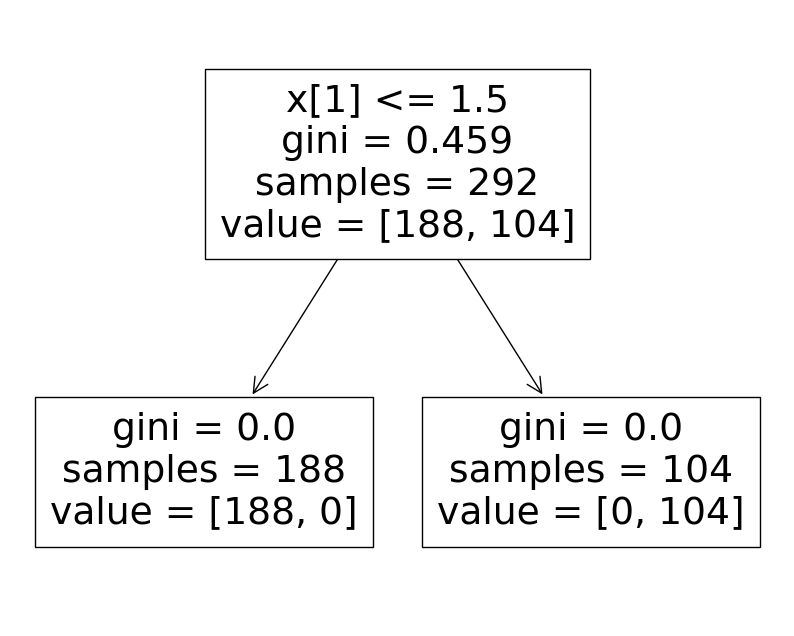

In [119]:
##Visualize decision-trees
plt.figure(figsize=(10,8))

from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train)) 
plt.show()

### Decision Tree Classifier with criterion entropy¶


In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)

print("Training set score: {:.2f}".format(clf_en.score(X_train, y_train)))
print("Test set score: {:.2f}".format(clf_en.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_en)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_en))
print("Classification_Report: \n",classification_report(y_test,y_pred_en))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[78  0]
 [ 0 48]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        48

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



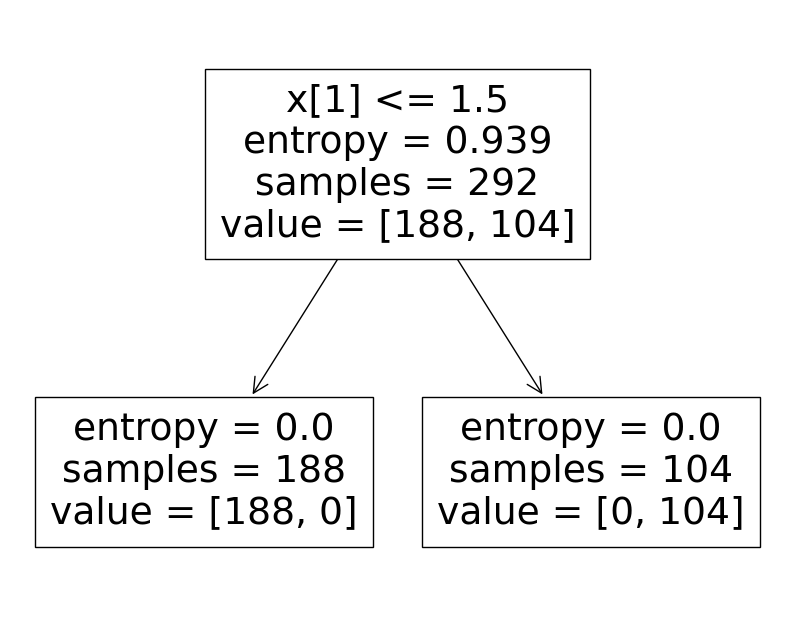

In [121]:
plt.figure(figsize=(10,8))

from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train)) 
plt.show()

### Gradient boosting machine

In [122]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

print("Training set score: {:.2f}".format(gbm.score(X_train, y_train)))
print("Test set score: {:.2f}".format(gbm.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_gbm)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_gbm))
print("Classification_Report: \n",classification_report(y_test,y_pred_gbm))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[78  0]
 [ 0 48]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        48

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



### XGBoost (n_estimators=500)

In [123]:
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xgb = xgb.XGBClassifier(n_estimators= 500)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

print("Training set score: {:.2f}".format(xgb.score(X_train, y_train)))
print("Test set score: {:.2f}".format(xgb.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_xgb)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_xgb))
print("Classification_Report: \n",classification_report(y_test,y_pred_xgb))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[78  0]
 [ 0 48]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        48

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



We can see that most of the models work very well with the data set and give acuracy score of 100 like 

1. LogisticRegression
2. RandomForestClassifier
4. AdaBoostClassifier
5. GradientBoostingClassifier
6. Naive Bayes GaussianNB Classifier
7. Extra Tree Classifier (n_estimators=500)
8. Support Vector Classifier (kernel='linear')
9. Decision Tree Classifier
10. Decision Tree Classifier with criterion gini index
11. Decision Tree Classifier with criterion entropy¶

We can use any of these models to predict on new data to know weather a person can survive this disater or not

### prediction

In [126]:
prediction=lr.predict((np.array([[1,2,12,1,1,15,1]])))
if prediction==1:
    print("This person has survived :",prediction)
else:
    print("This person didn't make it")

This person has survived : [1]
